<a href="https://colab.research.google.com/github/Priyanka-Bankar/machine-learning--zoomcamp/blob/main/Homewotk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'


In [ ]:
!wget $data

--2024-10-10 04:23:16--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2024-10-10 04:23:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.05s   

2024-10-10 04:23:16 (5.70 MB/s) - ‘laptops.csv’ saved [298573/298573]

FINISHED --2024-10-10 04:23:16--
Total wall clock time: 0.3s
Downloaded: 1 files, 292K in 0.05s (5.70 MB/s)


In [ ]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### Prepare dataset

In [ ]:
# First, we'll normalize the names of the columns:

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
# use only the following columns:

In [ ]:
df = df[['ram','storage','screen','final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


## EDA

In [ ]:
# Look at the final_price variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

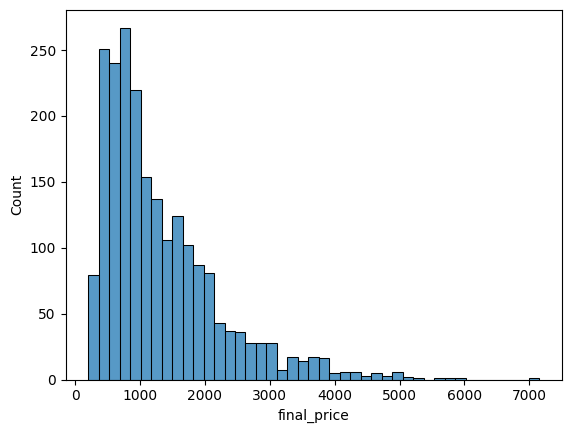

In [ ]:
sns.histplot(df.final_price)

# yes

# log transform

In [ ]:
final_price_logs = np.log1p(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

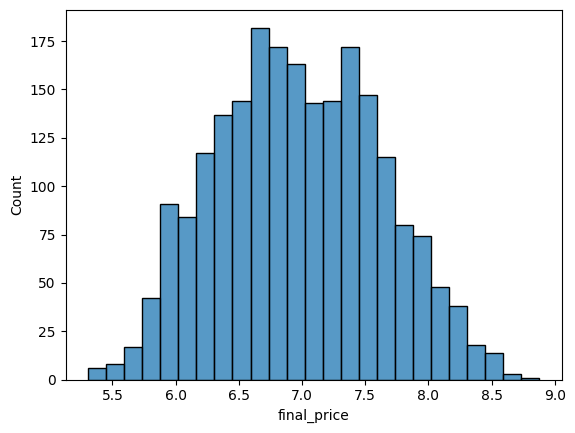

In [ ]:
sns.histplot(final_price_logs)

# Question 1
 There's one column with missing values. What is it?

- 'ram'
- 'storage'
- 'screen'
- 'final_price'

In [ ]:
null_column = df.isnull().sum()
null_column_name = null_column[null_column > 0 ]
print('The one column with missing value is : ',null_column_name)

The one column with missing value is :  screen    4
dtype: int64


# Question 2
What's the median (50% percentile) for variable 'ram'?

In [ ]:
median_ram = df['ram'].median()
print('The median(50% percentile) for variable ram is', median_ram)

The median(50% percentile) for variable ram is 16.0


# Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.

- Split your data in train/val/test sets, with 60%/20%/20% distribution.

 Use the same code as in the lectures

In [ ]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [ ]:
n , n_val, n_test, n_train

(2160, 432, 432, 1296)

In [ ]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train+n_val:]


In [ ]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val :]]

In [ ]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [ ]:
df_train.reset_index(drop = True)
df_val.reset_index(drop = True)
df_test.reset_index(drop = True)

,ram,storage,screen,final_price
0,32,1000,15.6,4805.65
1,16,512,13.0,2189.00
2,16,512,15.6,1349.00
3,16,512,15.0,2175.83
4,16,1000,15.6,1248.59
...,...,...,...,...
427,8,512,15.0,1838.29
428,8,256,15.6,531.80
429,8,256,13.3,765.33
430,8,512,14.0,803.61


In [ ]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [ ]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [ ]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [ ]:
len(y_train)

1296

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [ ]:
base = ['ram','storage','screen']

### training model with 0

In [ ]:
def prepareXwith0(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
X_train = prepareXwith0(df_train)
w0 , w = train_linear_regression(X_train, y_train)

X_val = prepareXwith0(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
print('The rmse score is',round(score,2) )


The rmse score is 0.43


### training a model with mean

In [ ]:
def prepareXwithmean(df):
  df_num = df[base]
  df_num = df_num.fillna(X_train.mean())
  X = df_num.values
  return X

In [ ]:
X_train = prepareXwithmean(df_train)
w0 , w = train_linear_regression(X_train, y_train)

X_val = prepareXwithmean(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
print('The rmse score is',round(score,2) )



The rmse score is 0.43


# Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
def prepareXwith0(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
X_train = prepareXwith0(df_train)
X_val = prepareXwith0(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r,  round(rmse(y_val, y_pred),2))

     0 0.43
  0.01 0.43
   0.1 0.43
     1 0.43
     5 0.46
    10 0.51
   100 0.67


## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

- 19.176
- 29.176
- 39.176
- 9.176

In [ ]:

scores = []
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
# 1. Split data with the current seed

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train + n_val]]
  df_test = df.iloc[idx[n_train+n_val :]]

  df_train.reset_index(drop = True, inplace=True)
  df_val.reset_index(drop = True, inplace=True)
  df_test.reset_index(drop = True, inplace=True)

  y_train = np.log1p(df_train.final_price.values)
  y_val = np.log1p(df_val.final_price.values)
  y_test = np.log1p(df_test.final_price.values)

  # 2. Prepare data (fill missing values with 0)
  X_train = prepareXwith0(df_train)

  # 3. Train model (without regularization)
  w0 , w = train_linear_regression(X_train, y_train)

  # 4. Evaluate on validation set and store the score
  X_val = prepareXwith0(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  scores.append(score)
  print('The seed value {} and corresponding rmse score is {}'.format(seed,score))




# Calculate and print the standard deviation of the scores
print(scores)
print('The standard deviation of all rmse score is :', round(np.std(scores),3))


The seed value 0 and corresponding rmse score is 0.43004215694158965
The seed value 1 and corresponding rmse score is 0.4520794495247242
The seed value 2 and corresponding rmse score is 0.4462625574236662
The seed value 3 and corresponding rmse score is 0.4464515565727131
The seed value 4 and corresponding rmse score is 0.4199805419364144
The seed value 5 and corresponding rmse score is 0.4254576323418724
The seed value 6 and corresponding rmse score is 0.4488322872387867
The seed value 7 and corresponding rmse score is 0.4309159875904646
The seed value 8 and corresponding rmse score is 0.4428849183283987
The seed value 9 and corresponding rmse score is 0.40840334262399886
[0.43004215694158965, 0.4520794495247242, 0.4462625574236662, 0.4464515565727131, 0.4199805419364144, 0.4254576323418724, 0.4488322872387867, 0.4309159875904646, 0.4428849183283987, 0.40840334262399886]
The standard deviation of all rmse score is : 0.014


# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [ ]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val :]]

df_train.reset_index(drop = True, inplace=True)
df_val.reset_index(drop = True, inplace=True)
df_test.reset_index(drop = True, inplace=True)

df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop=True, inplace=True)

y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepareXwith0(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepareXwith0(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(round(score,2))

0.46
